In [1]:
from mb_rag.basic import ModelFactory
llm = ModelFactory(model_name="gemini-3-pro-preview",model_type='google')


In [2]:
from mb_rag.agents.get_langsmith import set_langsmith_parameters
import os
from dotenv import load_dotenv
load_dotenv()
set_langsmith_parameters(langsmith_endpoint="https://api.smith.langchain.com",
                        langsmith_project="BB-Labeling-Agent-Project",
                        langsmith_tracing="true")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [3]:
from mb_rag.agents.seg_autolabel import create_bb_agent,SegmentationGraph

In [4]:
agent = create_bb_agent(llm.model,logging=False,langsmith_params=True)
graph_agent = SegmentationGraph(agent)

/home/winnow/.local/lib/python3.10/site-packages/langsmith/client.py:292: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


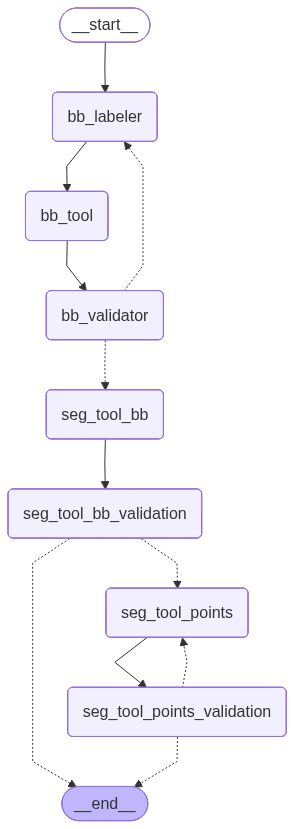

In [5]:
from IPython.display import Image, display
display(Image(graph_agent._build_graph().get_graph(xray=True).draw_mermaid_png()))

Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=f817f5da-1e75-4b5e-a86f-61f649327de4,id=f817f5da-1e75-4b5e-a86f-61f649327de4; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=09edb51b-3ac6-4560-9674-c7af6d678bbc; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=83e9f0bc-ad9a-47a8-b942-96f4d082ad44; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=813a8273-4db8-46cd-b242-c1df6f0e192a; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=46eb713d-3893-49ab-882e-3bd35d74cb5e; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=03b09030-fb6c-4e4c-9d4a-aac734e5eaa9; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=cbfd1bcb-ec9f-49d1-b702-5db337482451; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=6280f46e-c54d-4210-a442-8814dd3a8876


respone from LLM : content=[{'type': 'text', 'text': '```json\n{\n  "labeled_objects": [\n    {\n      "label": "scrambled eggs",\n      "box": [\n        0.188,\n        0.348,\n        0.758,\n        0.642\n      ],\n      "valid": false\n    }\n  ]\n}\n```', 'extras': {'signature': 'EtgPCtUPAXLI2nxhNxCAmMYhGFYBfYBFDUf+OgBIPgTfmo3+U4v63SoTnYm5muqy4zRBy0PCCnv0MsmplIdY/YiPEHJWrBwpnQYe+r8fYPVrM4UsfpABJx64PBG9QL0fpgleHZhqhUJbSNH9SDNLQt4CSqbDQepAm3PpLY99GaNyVyLtRSVcC2uHE7yEh99aQJebXL7uvG+bvflfmU2nGBGRQlb+7czbtjUL8S0vyi50JM6li9p8A/LduEq8LKjcg8iUpb24WbL+hKU3noPg+CVHNhKWWQVUYdnzjrNtdwOc2tyQKfUxHGFtSo8mpcUYs9G4UNYrd8LvYEdxYxTQ+kooft9RCMREQQqmnXorrMHjt1J+pZBq0Ogxd85s/2cqqhADQSHFRItt1eXyx6gDzajGc8KnbLlTKVTry8CLNekmK/n0Qr4A4qLAZz6fNsX60WV+adz/iZxYaDLoQd9JrjbW3+R9eprRgYdhfb+4e0s1CnpNcVJwtOXw++5ifq+DuCGoo32n0UqKzAPHLsQGu8ED7pgJoqIv1pWwBMZF5Km0CjPImeXA1Y1HFDAKNtnsybZg+9oZo/cBsEc49Bo7pP/kFF/HzI3HT5sJWfwURWnywzDoEbmWc27/1ojvf0LkcNRlQZ6xuTXcMq1U18JxBiAkrX+ML7YaLOcabJCf8a1i80Jk8/xDLNJ5wurrdXiNE0onWyOS

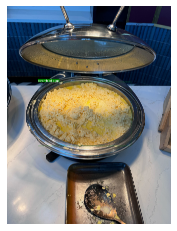

Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=6280f46e-c54d-4210-a442-8814dd3a8876; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=03b09030-fb6c-4e4c-9d4a-aac734e5eaa9; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=46eb713d-3893-49ab-882e-3bd35d74cb5e; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=813a8273-4db8-46cd-b242-c1df6f0e192a; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=23a0738e-62c6-4a08-afc5-2e16c78e49e2; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=1b7bbd68-e856-4331-a22a-6fa9e809f1d7; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=3ce5e7fe-99f7-44a4-a5ae-afc0596b4106
Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langch

respone from LLM : content=[{'type': 'text', 'text': '```json\n{\n  "bb_valid": true,\n  "failed_labels": []\n}\n```', 'extras': {'signature': 'EuELCt4LAXLI2nys0790VmnvWxRvzXtWp6Hq2FF2bzQ3YIbIse49ywoQjvY/DZqsilojH4F5FbSfpqJ4uMglk2UP9mncXP+i271J0F3ZWDYfszQkpa5q3ru4bAubyFEjqhimzFexyOW73sXCkTpCdMv/5lSj2qw7gKa0SnEJiuYO6t1LxoYd2+D9Ow/10wI1q9EYz40KkwuEvIHyBXso5BmgkQVUvDrgoTYx1hEjlXHAKkIwDwPXeZeUZfQTyo5rPT6jDlsCmaji5L+tqZ4id35uYm4khawsruHAe5q6iFTxosDm+qhIak8evGeRpI6Eu65ZAJPoz+6xL3Y+xtoYzp/lTz4z3UUpKLsyAskjQ+74slnSIBNRNz8CGdblWKdCRL8yfhRnSFaizYo3AZSzcw0LtoI+Z1tQX0drwXcbBps+FGYcvmy5hDF9bAt1RrZfZYB9ukfbpJyUVppejbdi7t3QnLrdZyU3ATmIDd4fC6CoDWKk6cYR5FWE+PgqpizHdN97gofoVWTvunSvuHw08bP5cy8Ncni/EFioV/9ZUtHDIOct7433snJfDVK6xC4hMfZRHqbqvtPAkjJhPq7YI4Kzmy4r5L/Hq+IbvRuntFNA8+Th27ilb8r9QsBLSvt8JrbvfqlXSVDtWz3dfGvI/kYQgS27zdbqLpOx0lbicrL475QjL79fxDHgsK+r32+LQvjvddpBqNSj/c1IJaPgrsGZWjM7WynMSy/EgCvXqWc4+h2Ku94ojt4YKpzJhDNEelqj71gFvM5gOYvVNs/59gjR0VJPXJ0La19ADtk8aOuf60DC1auhJ1MilNHLLvHUzjW/u/EsrUtSccjm5aMrVLvh

TypeError: SEGTOOLS.__init__() missing 1 required positional argument: 'model_path'

Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=bcd1de2c-be87-4e55-970a-f71e820500fa; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=049d2e9d-03b4-4878-bcad-6600135b6ddc; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=6ea91e6f-54f3-434d-9ff0-6244094df5a0; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=2e4cbbc6-f191-4873-b710-6593dde2f4b9; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=97eaf862-5bc0-4dcf-aa17-f3c963f10fc5; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=d1352f6f-d7e9-489a-bd5e-166fe406bc4c; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=d1352f6f-d7e9-489a-bd5e-166fe406bc4c; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id=97eaf862-5bc0-4dcf-aa17-f3c963f10fc5; trace=09edb51b-3ac6-4560-9674-c7af6d678bbc,id

In [6]:
graph_agent.run(image_path='./data/IMG_1827.jpg', query="Crreate a bounding box around scra,bled eggs in the image.")

In [ ]:
from mb_rag.utils.extra import ImagePredictor

In [ ]:
a = ImagePredictor('./sam2_hiera_s.yaml','/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt')

In [ ]:
a.set_image('./data/image.jpg')

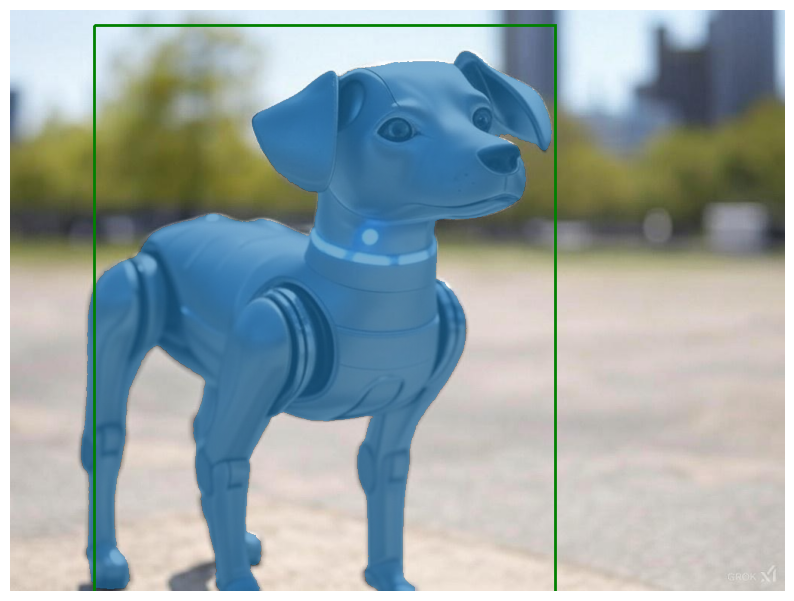

In [ ]:
mask,_,_ =a.predict_item(bbox=[20, 110, 800, 720]) 


(-0.5, 1023.5, 767.5, -0.5)

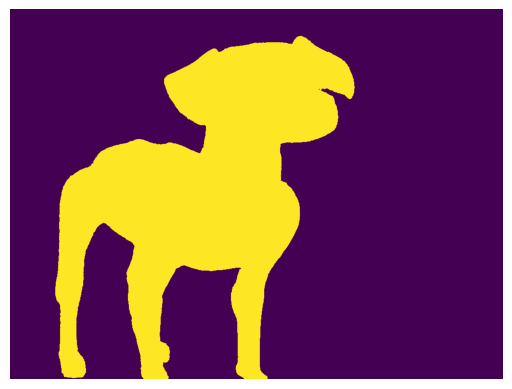

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mask_new = np.transpose(mask, (1, 2, 0))
plt.imshow(mask_new)
plt.axis('off')